In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('fc_transaction_base.csv')
data = df[['dc_indicator','lcy_amount']]
data

,dc_indicator,lcy_amount
0,withdraw,14500.00
1,withdraw,20000.00
2,withdraw,4000.00
3,withdraw,500.00
4,withdraw,5000.00
...,...,...
45026,withdraw,1000.00
45027,withdraw,1000.00
45028,withdraw,5000.00
45029,deposit,0.38


In [4]:
df_withdraw = data[data['dc_indicator']=='withdraw']
df_deposit = data[data['dc_indicator']=='deposit']

<Axes: title={'center': 'lcy_amount'}, xlabel='[dc_indicator]'>

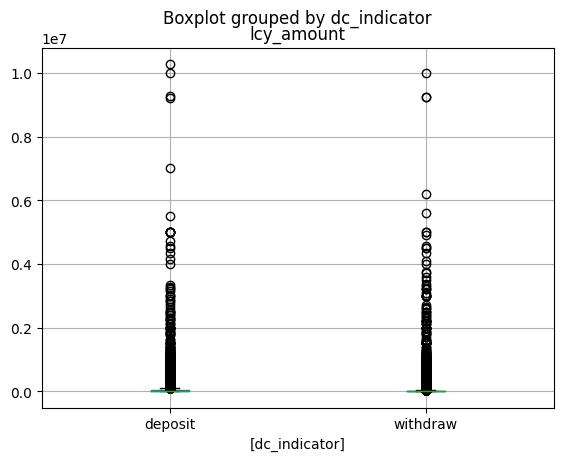

In [18]:
data.boxplot(by='dc_indicator')

Here, we can see that both the data are positively skewed. Therefore we can move forward with the assumption that the data does not follow normal distribution and the parameters of distribution are unknown for us.

In [64]:
from scipy import stats
import numpy as np

## Levene Test

* **Null Hypothesis:** The variance of amounts for deposit is equal to the variance of amounts for withdraw.<br>
* **Alternative Hypothesis:** The variance of amounts for deposit is significantly different from the variance of amounts for withdraw.

In [27]:
stat, p_value = levene_test = stats.levene(df_deposit['lcy_amount'], df_withdraw['lcy_amount'])
print("Levene Test:")
print(f"Statistic: {stat}")
print(f"P-value: {p_value}")

Levene Test:
Statistic: 362.43987311512467
P-value: 1.71831708971738e-80


Here, at a 5% significance level, we can see P value is < 0.05. Therefore we reject the Null hypothesis.

## Mann-Whitney U Test

* **Null Hypothesis:** The two samples come from the same population.<br>
* **Alternative Hypothesis:** The two samples do not come from the same population.

In [21]:
u_stat, p_value = stats.mannwhitneyu(df_deposit['lcy_amount'], df_withdraw['lcy_amount'])

print("Mann-Whitney U Test:")
print(f"Mann-Whitney U Statistic: {u_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U Test:
Mann-Whitney U Statistic: 275682854.0
P-value: 0.0


Here, at a 5% significance level, we can see P value is < 0.05 or strictly 0. Therefore we reject the Null hypothesis.

## Chi-Square Test

* **Null Hypothesis:** The proportion of credits is equal to the proportion of debits.<br>
* **Alternative Hypothesis:** The proportion of credits is significantly different from the proportion of debits.

In [72]:
observed = np.array(df['dc_indicator'].value_counts())

total = np.sum(observed)
expected = np.array([total / 2, total / 2])
chi2_stat, p_val, dof, ex = stats.chi2_contingency([observed, expected])

In [73]:
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: {ex}")

Chi-Square Statistic: 5340.83041462032
P-Value: 0.0
P-value: 1.0
Degrees of freedom: 1
Expected frequencies: [[27843.25 17187.75]
 [27843.25 17187.75]]


Here p-value is 0. Therfore we reject the null hypothesis.